In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
import numpy as np

In [5]:
file_path = r'..\Resources\Country-data.csv'

dataset_df = pd.read_csv(file_path, index_col='country')

In [6]:
dataset_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


## Feature Scaling

Clustering algorithms rely on distance calculations, making feature scaling essential.

All numerical variables were standardized using **z-score normalization**, ensuring:
- Mean = 0
- Standard deviation = 1

This prevents features with large numeric ranges (e.g., income, GDP) from dominating the clustering process.

In [7]:
# Standardize data
scaled_country_data = StandardScaler().fit_transform(dataset_df)

scaled_country_data

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [8]:
# Create new df with standardized data
scaled_country_df = pd.DataFrame(scaled_country_data, columns=dataset_df.columns, index=dataset_df.index)
scaled_country_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754


## K-Means Clustering

K-Means clustering was applied to group countries based on socio-economic and health indicators.

To ensure stability:
- `n_init = 100` was used to avoid poor local minima
- Multiple values of `k` were evaluated

Cluster quality was assessed using:
- **Inertia (Elbow Method)** for compactness
- **Calinski–Harabasz Score** for separation and cohesion

---

## Agglomerative Clustering

Agglomerative (hierarchical) clustering was used as a robustness check.

Unlike K-Means, this method:
- Does not assume spherical clusters
- Builds clusters based on hierarchical merging

Cluster quality was evaluated using the Calinski–Harabasz score for consistency.


In [ ]:
def model_metrics(k, dataframe):
    # Store evaluation metrics for Kmeans
    inertia = []
    ch_kmeans = []

    # Store evaluation metrics for Agglomerative
    ch_agglo = []

    for i in k:
        # Initialize K-Means with multiple initializations
        k_model = KMeans(n_clusters=i, n_init=100, random_state=42)
        
        # Fit model and get labels
        k_model.fit(dataframe)
        labels = k_model.labels_
        
        # Store inertia and Calinski-Harabasz score
        inertia.append(k_model.inertia_)
        ch_kmeans.append(metrics.calinski_harabasz_score(dataframe, labels))

        #----

        # Initialize agglomerative clustering
        agglo_model = AgglomerativeClustering(n_clusters=i)

        # Fit model and get labels
        agglo_model.fit(dataframe)
        labels = agglo_model.labels_

        # Store Calinski-Harabasz score
        ch_agglo.append(metrics.calinski_harabasz_score(dataframe, labels))

    return inertia, ch_kmeans, ch_agglo

In [ ]:
# Range of cluster values to evaluate
k = list(range(2,11))

# Evaluate metrics for models
inertia, ch_kmeans, ch_agglo = model_metrics(k, scaled_country_df)

In [24]:
metrics_data = {'k': k, 'inertia': inertia, 'kmeans_ch_score': ch_kmeans, 'agglo_ch_score': ch_agglo}
metrics_df = pd.DataFrame(metrics_data)
metrics_df

,k,inertia,kmeans_ch_score,agglo_ch_score
0,2,1050.214558,71.137462,51.883430
1,3,831.424435,66.234758,50.716151
2,4,700.391720,62.262848,48.262593
3,5,619.937115,57.689798,49.148383
4,6,550.490082,55.715480,48.546270
5,7,495.323383,54.250167,48.466199
6,8,450.530833,53.062041,47.869375
7,9,421.280718,50.711924,47.191340
8,10,394.281755,49.053687,45.201008


In [20]:
def simple_plot(ax, x, y, xlabel, ylabel, title):
    ax.plot(x, y)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.grid()

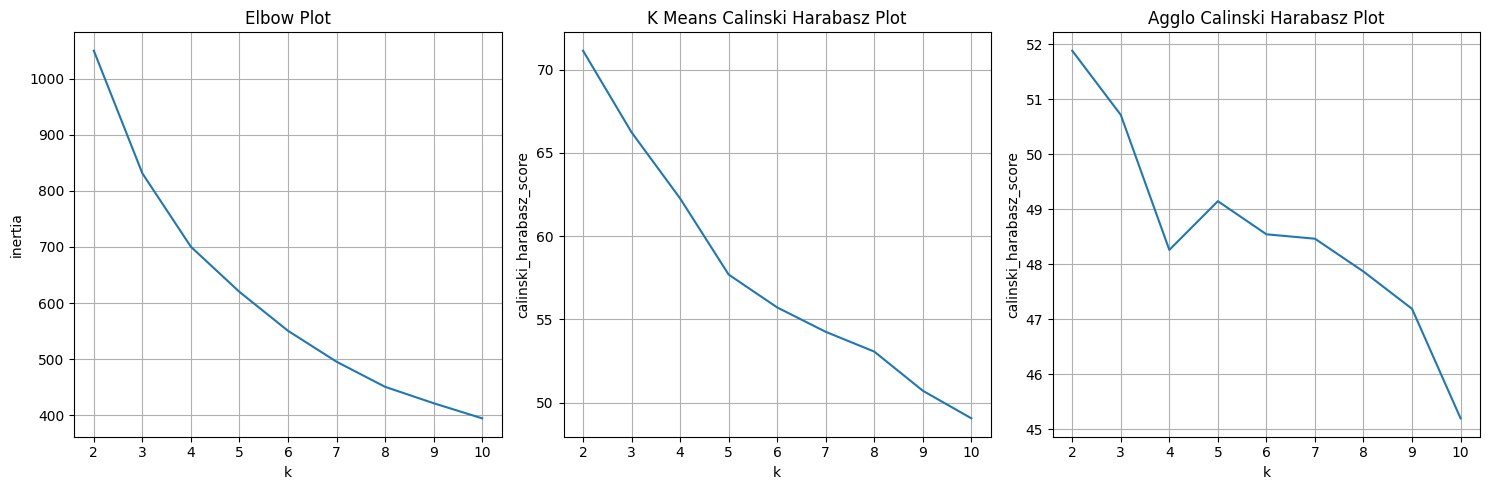

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

simple_plot(ax[0], metrics_df['k'], metrics_df['inertia'],
            'k', 'inertia', 'Elbow Plot')

simple_plot(ax[1], metrics_df['k'], metrics_df['kmeans_ch_score'],
            'k', 'calinski_harabasz_score', 'K Means Calinski Harabasz Plot')

simple_plot(ax[2], metrics_df['k'], metrics_df['agglo_ch_score'],
            'k', 'calinski_harabasz_score', 'Agglo Calinski Harabasz Plot')

plt.tight_layout()
plt.show()

I tested multiple random seeds (0, 10, 21, 42, 100) and observed consistent clustering structure. I selected random_state=42 for reproducibility, as results were stable across seeds.

Although including all features produced a higher Calinski–Harabasz score for k=2, this solution resulted in an overly coarse segmentation that does not support the objective of prioritizing aid allocation. Highly correlated variables such as income, life expectancy, and fertility were therefore removed to reduce redundancy and allow more nuanced socio-economic patterns to emerge. Using the reduced feature set, both the elbow method and Calinski–Harabasz score indicated k=6 as the optimal number of clusters.

In [25]:
least_corr_cols = scaled_country_df.copy().drop(columns=['income', 'life_expec', 'total_fer'])
least_corr_cols

,child_mort,exports,health,imports,inflation,gdpp
country,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,0.157336,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.312347,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,0.789274,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,1.387054,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,-0.601749,-0.041817
...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.489784,-0.546913
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,3.616865,0.029323
Vietnam,-0.372315,1.130305,0.008877,1.380030,0.409732,-0.637754


In [26]:
# Evaluate metrics for models
inertia, ch_kmeans, ch_agglo = model_metrics(k, least_corr_cols)

In [27]:
metrics_data = {'k': k, 'inertia': inertia, 'kmeans_ch_score': ch_kmeans, 'agglo_ch_score': ch_agglo}
metrics_df = pd.DataFrame(metrics_data)
metrics_df

,k,inertia,kmeans_ch_score,agglo_ch_score
0,2,776.536076,47.907043,41.446564
1,3,646.469060,45.096570,42.072717
2,4,529.104192,48.561334,44.842651
3,5,451.029787,49.474102,45.667472
4,6,383.584032,51.912990,47.741515
5,7,344.948807,50.794103,45.845335
6,8,311.371413,50.380781,45.072372
7,9,288.315624,48.888320,43.308790
8,10,267.874796,47.807433,42.132445


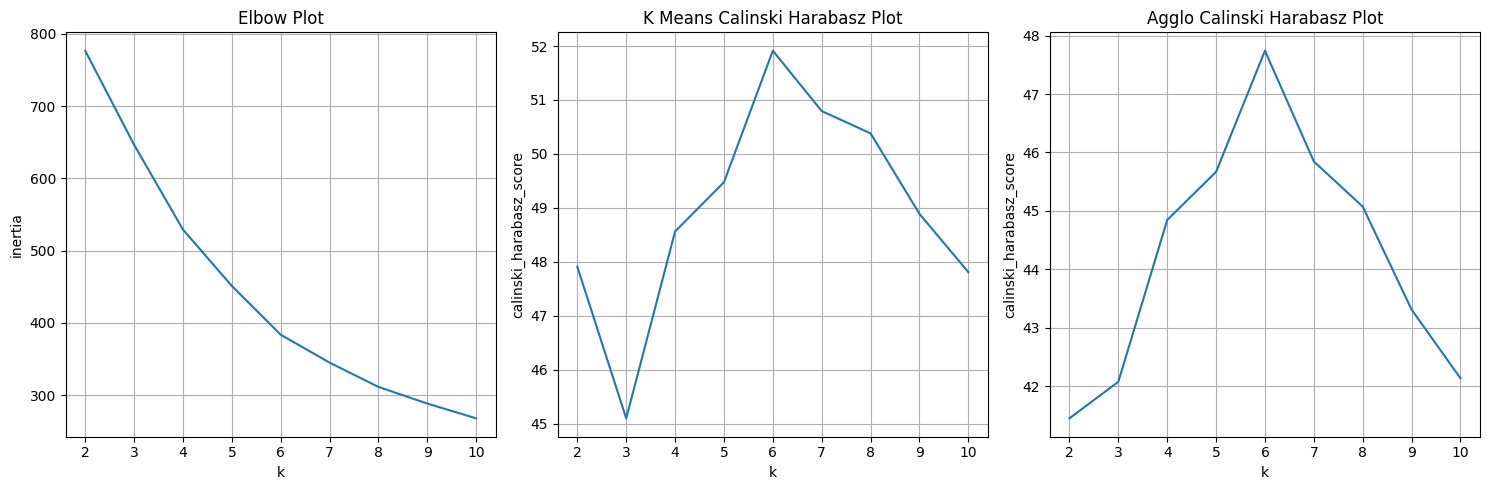

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

simple_plot(ax[0], metrics_df['k'], metrics_df['inertia'],
            'k', 'inertia', 'Elbow Plot')

simple_plot(ax[1], metrics_df['k'], metrics_df['kmeans_ch_score'],
            'k', 'calinski_harabasz_score', 'K Means Calinski Harabasz Plot')

simple_plot(ax[2], metrics_df['k'], metrics_df['agglo_ch_score'],
            'k', 'calinski_harabasz_score', 'Agglo Calinski Harabasz Plot')

plt.tight_layout()
plt.show()

## Clustering in PCA Space

PCA was applied to:
- Reduce dimensionality
- Remove multicollinearity
- Improve interpretability of clusters

Clustering was repeated using PCA-transformed data to:
- Reduce noise
- Improve separation
- Validate clustering stability


In [15]:
pca = PCA(n_components=4)

country_pca_data = pca.fit_transform(scaled_country_df)
country_pca_data[0:5]

array([[-2.91302459,  0.09562058, -0.7181185 ,  1.00525464],
       [ 0.42991133, -0.58815567, -0.3334855 , -1.16105859],
       [-0.28522508, -0.45517441,  1.22150481, -0.8681145 ],
       [-2.93242265,  1.69555507,  1.52504374,  0.83962501],
       [ 1.03357587,  0.13665871, -0.22572092, -0.84706269]])

In [16]:
# Calculate the explained variance
print(pca.explained_variance_ratio_)

print(f"Cumulative variance: {sum(pca.explained_variance_ratio_)}")

[0.4595174  0.17181626 0.13004259 0.11053162]
Cumulative variance: 0.8719078614023912


### PCA Variance Explained

| Number of Components | Cumulative Variance Explained |
|----------------------|-------------------------------|
| 3 PCs               | 76.1%                         |
| 4 PCs               | 87.1%                         |
| 5 PCs               | 94.5%                         |
| 6 PCs               | 97.0%                         |

Although three components capture the dominant variance structure, four components were retained to exceed the 80% explained variance threshold and preserve additional meaningful socio-economic dimensions relevant for clustering.

Using three components overly compressed the data and resulted in a dominant binary cluster structure. Five components introduced diminishing returns and reduced cluster separability. Four components provided the best trade-off, retaining 87.1% of variance while preserving multi-dimensional socio-economic structure suitable for meaningful country segmentation.


In [ ]:
# Creating a DataFrame with the PCA data
df_country_pca = pd.DataFrame(country_pca_data, columns=["PCA1", "PCA2","PCA3","PCA4"])

# Set the Ticker column as index
df_country_pca = df_country_pca.set_index(scaled_country_df.index)

# Review the DataFrame
df_country_pca.head()

,PCA1,PCA2,PCA3,PCA4
country,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255
Albania,0.429911,-0.588156,-0.333486,-1.161059
Algeria,-0.285225,-0.455174,1.221505,-0.868115
Angola,-2.932423,1.695555,1.525044,0.839625
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063


In [ ]:
# Evaluate metrics for models
inertia, ch_kmeans, ch_agglo = model_metrics(k, df_country_pca)

In [19]:
metrics_data = {'k': k, 'inertia': inertia, 'kmeans_ch_score': ch_kmeans, 'agglo_ch_score': ch_agglo}
metrics_df = pd.DataFrame(metrics_data)
metrics_df

,k,inertia,kmeans_ch_score,agglo_ch_score
0,2,859.095410,86.693569,80.135079
1,3,643.353030,85.029844,70.679295
2,4,514.101194,84.165881,69.684759
3,5,445.860476,78.538000,72.830568
4,6,396.679349,74.176538,70.595238
5,7,351.492873,72.755170,69.650246
6,8,316.222656,71.417365,67.857816
7,9,287.135025,70.388537,67.817121
8,10,260.146647,70.431192,66.551145


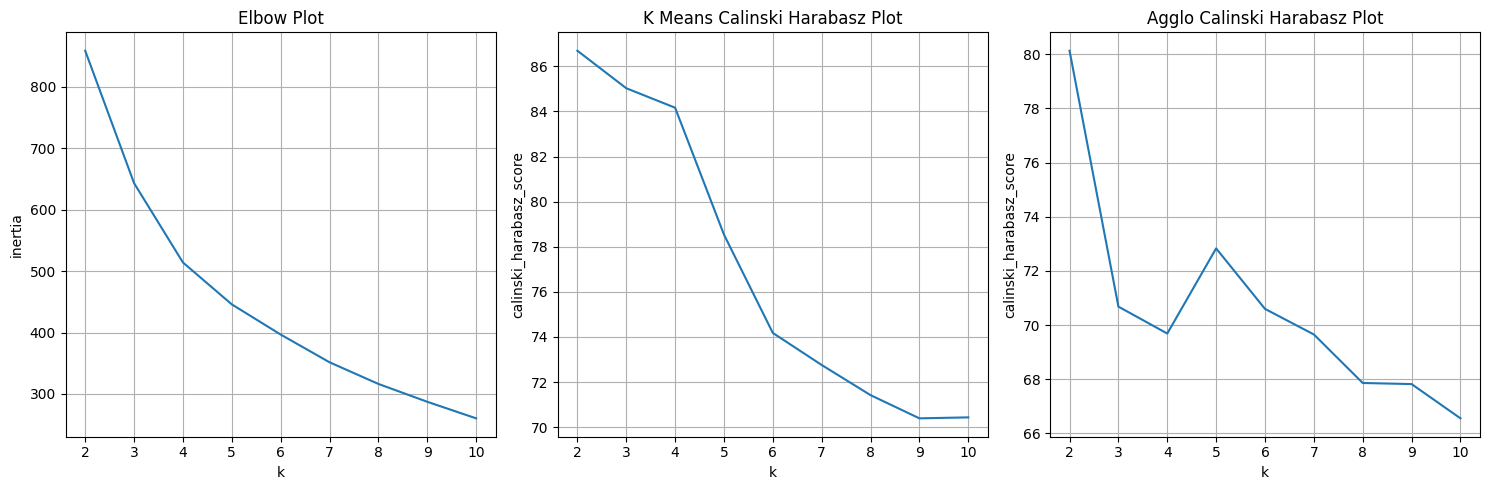

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

simple_plot(ax[0], metrics_df['k'], metrics_df['inertia'],
            'k', 'inertia', 'Elbow Plot')

simple_plot(ax[1], metrics_df['k'], metrics_df['kmeans_ch_score'],
            'k', 'calinski_harabasz_score', 'K Means Calinski Harabasz Plot')

simple_plot(ax[2], metrics_df['k'], metrics_df['agglo_ch_score'],
            'k', 'calinski_harabasz_score', 'Agglo Calinski Harabasz Plot')

plt.tight_layout()
plt.show()

Although PCA indicated a dominant two-cluster structure, two clusters would be insufficient for actionable aid prioritization. Therefore, a finer segmentation (k = 6) was selected to better support humanitarian prioritization, consistent with results from non-PCA clustering.

In [ ]:
# Show correlations feature to PCA correlations
pca_component_weights = pd.DataFrame(pca.components_.T, 
                                     columns=["PCA1", "PCA2","PCA3","PCA4"], 
                                     index=scaled_country_df.columns)

pca_component_weights.sort_values(by=['PCA1'], ascending=False)

,PCA1,PCA2,PCA3,PCA4
life_expec,0.425839,-0.222707,0.113919,-0.203797
income,0.398441,0.022536,0.301548,0.392159
gdpp,0.392645,-0.046022,0.122977,0.531995
exports,0.283897,0.613163,0.144761,0.003091
imports,0.161482,0.671821,-0.299927,-0.071907
health,0.150838,-0.243087,-0.596632,0.461897
inflation,-0.193173,-0.008404,0.642520,0.150442
total_fer,-0.403729,0.155233,0.019549,0.378304
child_mort,-0.419519,0.192884,-0.029544,0.370653


## Interpretation of Principal Components

### **PCA1 — Overall Development & Well-Being (Primary Poverty Axis)**
**Explained Variance:** ~46%

**High positive loadings:**
- Life expectancy (`life_expec`) **(+0.426)**
- Income (`income`) **(+0.398)**
- GDP per capita (`gdpp`) **(+0.393)**

**High negative loadings:**
- Child mortality (`child_mort`) **(−0.420)**
- Total fertility rate (`total_fer`) **(−0.404)**

This component represents a development gradient. Higher scores indicate wealthier countries with longer life expectancy and lower child mortality, while lower scores indicate greater humanitarian vulnerability.

---

### **PCA2 — Trade & Economic Openness**
**Explained Variance:** ~17%

**High positive loadings:**
- Imports (`imports`) **(+0.672)**
- Exports (`exports`) **(+0.613)**

This component differentiates countries by trade intensity and global economic integration. It reflects economic structure rather than direct humanitarian need.

---

### **PCA3 — Macroeconomic Stress vs. Health Investment**
**Explained Variance:** ~13%

**High positive loadings:**
- Inflation (`inflation`) **(+0.643)**

**High negative loadings:**
- Health expenditure (`health`) **(−0.597)**

This component captures macroeconomic instability and potential health system strain, where higher scores indicate higher inflation and lower health spending.

---

### **PCA4 — Wealth vs. Demographic & Health Pressure**
**Explained Variance:** ~11%

**High positive loadings:**
- GDP per capita (`gdpp`) **(+0.532)**
- Health expenditure (`health`) **(+0.462)**
- Income (`income`) **(+0.392)**
- Child mortality (`child_mort`) **(+0.371)**
- Total fertility rate (`total_fer`) **(+0.378)**

This component reflects transitional or unequal development, where economic gains coexist with persistent demographic or health challenges.


## Model Selection for Final Cluster Scoring

Although multiple feature configurations and clustering approaches were evaluated, the **PCA-based clustering model** was selected as the primary framework for final cluster scoring.

PCA reduces multicollinearity, removes redundant information, and preserves the dominant variance drivers in the data, particularly those related to development, health outcomes, and economic stability. This results in more stable, interpretable, and robust cluster assignments suitable for prioritizing humanitarian aid.

In [22]:
k_model = KMeans(n_clusters=6, n_init=100, random_state=42)
k_model.fit(df_country_pca)
country_clusters = k_model.predict(df_country_pca)
country_clusters

array([1, 0, 3, 1, 0, 3, 3, 2, 2, 3, 0, 0, 3, 0, 0, 2, 0, 1, 0, 3, 0, 1,
       3, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 3, 3, 3, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 3, 3, 3, 0, 1, 1, 0, 0, 2, 2, 3, 1, 0, 2, 1, 2, 0, 3, 1, 1, 0,
       1, 0, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 0, 3, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 3, 0, 5, 0, 1, 1, 0, 0, 1, 5, 1, 0, 0, 0, 3, 0, 0, 1, 3, 1, 3,
       2, 2, 1, 4, 2, 3, 1, 0, 0, 3, 3, 0, 2, 2, 0, 3, 1, 0, 3, 1, 0, 0,
       1, 5, 0, 0, 0, 1, 0, 2, 3, 0, 1, 0, 2, 2, 3, 1, 0, 1, 1, 3, 0, 3,
       0, 1, 0, 2, 2, 2, 3, 3, 0, 3, 0, 1, 1], dtype=int32)

In [23]:
predictions_df = df_country_pca.copy()

predictions_df['country_cluster'] = country_clusters

predictions_df.head()

,PCA1,PCA2,PCA3,PCA4,country_cluster
country,,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255,1
Albania,0.429911,-0.588156,-0.333486,-1.161059,0
Algeria,-0.285225,-0.455174,1.221505,-0.868115,3
Angola,-2.932423,1.695555,1.525044,0.839625,1
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,0


## PCA Interpretation Rules

PCA scores are expressed in **standardized units**. A score near zero represents an average country profile along a given component.

| Absolute PCA Score | Interpretation |
|--------------------|----------------|
| \|PC\| < 1         | Typical        |
| 1 ≤ \|PC\| < 2     | Moderately distinct |
| 2 ≤ \|PC\| < 3     | Strongly distinct |
| \|PC\| ≥ 3         | Extreme        |

Scores between ±1 and ±2 indicate moderate deviation from the global norm, scores between ±2 and ±3 indicate strong deviation, and values exceeding ±3 indicate extreme structural difference.

---

### Risk Direction by Component

- **PCA1 — Development:**  
  Negative values indicate lower development and higher humanitarian risk.

- **PCA2 — Trade Openness:**  
  Reflects economic structure and integration; not a direct indicator of humanitarian risk.

- **PCA3 — Economic Stress:**  
  Positive values indicate higher inflation and lower health investment, implying increased vulnerability.

- **PCA4 — Inequality / Transitional Pressure:**  
  Positive values indicate economic progress coexisting with persistent demographic or health strain.

---

### Risk Classification Logic

Clusters exhibiting:
- **Strongly negative PCA1** (low development), combined with
- **Strongly positive PCA3** (economic stress) and/or
- **Strongly positive PCA4** (inequality or transitional strain)

are categorized as **high-risk** or **extreme-need** groups for humanitarian assistance.


In [ ]:
def pca_level(x):
    if abs(x) < 1:
        return 'low'
    elif 1<= abs(x) < 2:
        return 'moderate'
    elif 2 <= abs(x) < 3:
        return 'strong'
    elif abs(x) >= 3:
        return 'extreme' 

In [28]:
pca_centers = predictions_df.groupby("country_cluster").mean().sort_values(by="PCA1")

for i in range(1, 5):
    pca_centers[f"level{i}"] = pca_centers[f"PCA{i}"].apply(pca_level)

pca_centers = pca_centers[['PCA1','level1', 'PCA2', 'level2', 'PCA3', 'level3', 'PCA4', 'level4']]

pca_centers

,PCA1,level1,PCA2,level2,PCA3,level3,PCA4,level4
country_cluster,,,,,,,,
4,-4.912066,extreme,-0.094499,low,6.110158,extreme,2.412421,strong
1,-2.433276,strong,0.440636,low,-0.280903,low,0.666956,low
3,-0.346959,low,-0.706620,low,0.705973,low,-0.632583,low
0,0.676870,low,0.296691,low,-0.421125,low,-0.752718,low
2,2.637228,strong,-0.954222,low,0.098352,low,1.123274,moderate
5,5.460225,extreme,5.432473,extreme,0.211648,low,0.906058,low


## Severity Scoring & Cluster Ranking

To prioritize countries for humanitarian aid allocation, a **severity score** was constructed using cluster centers in PCA space. The score combines the most policy-relevant dimensions identified through PCA, weighted by their explained variance.

### Severity Score Construction

The severity score incorporates:
- **PCA1 (Development)** — negatively weighted  
  - Lower values indicate poorer development and higher humanitarian need
- **PCA3 (Economic Stress)** — absolute magnitude weighted  
  - Captures inflationary pressure and reduced health investment
- **PCA4 (Inequality / Transitional Pressure)** — absolute magnitude weighted  
  - Captures demographic and health strain alongside economic progress

Each component was weighted by its corresponding **explained variance ratio**, ensuring that more informative dimensions contribute proportionally more to the final score.

---

### Cluster-Level Severity Results

| Cluster | PCA1 | PCA2 | PCA3 | PCA4 | Severity Score | Priority Rank |
|-------|------|------|------|------|----------------|---------------|
| 4 | Extreme (−) | Low | Extreme | Strong | **3.32** | **1** |
| 1 | Strong (−) | Low | Low | Low | **1.23** | **2** |
| 3 | Low | Low | Low | Low | **0.32** | **3** |
| 0 | Low | Low | Low | Low | **−0.17** | **4** |
| 2 | Strong (+) | Low | Low | Moderate | **−1.07** | **5** |
| 5 | Extreme (+) | Extreme | Low | Low | **−2.38** | **6** |

---

### Interpretation

- **Cluster 4** ranks highest in severity due to extreme underdevelopment (strongly negative PCA1), extreme economic stress (PCA3), and strong transitional pressure (PCA4).
- **Cluster 1** reflects severe underdevelopment with moderate additional strain.
- **Clusters 3 and 0** represent vulnerable but relatively stable developing groups.
- **Clusters 2 and 5** score lowest in severity, reflecting developed or self-sufficient profiles despite structural differences.

This severity ranking provides a **data-driven, interpretable framework** for prioritizing humanitarian aid allocation across country clusters.


In [ ]:
weights = pca.explained_variance_ratio_

severity_score = (
    -weights[0] * pca_centers["PCA1"] +
     weights[2] * np.abs(pca_centers["PCA3"]) +
     weights[3] * np.abs(pca_centers["PCA4"])
)

# Add severity score & rank 
pca_centers["Severity_Score"] = severity_score
pca_centers["Severity_Rank"] = pca_centers["Severity_Score"].rank(ascending=False)


pca_centers.sort_values("Severity_Score", ascending=False)

,PCA1,level1,PCA2,level2,PCA3,level3,PCA4,level4,Severity_Score,Severity_Rank
country_cluster,,,,,,,,,,
4,-4.912066,extreme,-0.094499,low,6.110158,extreme,2.412421,strong,3.318409,1.0
1,-2.433276,strong,0.440636,low,-0.280903,low,0.666956,low,1.228382,2.0
3,-0.346959,low,-0.706620,low,0.705973,low,-0.632583,low,0.321161,3.0
0,0.676870,low,0.296691,low,-0.421125,low,-0.752718,low,-0.173070,4.0
2,2.637228,strong,-0.954222,low,0.098352,low,1.123274,moderate,-1.074905,5.0
5,5.460225,extreme,5.432473,extreme,0.211648,low,0.906058,low,-2.381397,6.0


## Priority Ranking for Aid Allocation

Based on the final cluster scoring framework, countries are prioritized for humanitarian assistance in the following order (from highest to lowest need):

1. **Cluster 4 — Extreme Humanitarian Crisis**
2. **Cluster 1 — Severely Underdeveloped**
3. **Cluster 3 — Vulnerable Developing**
4. **Cluster 0 — Developing but Stable**
5. **Cluster 2 — Developed / Transitional**
6. **Cluster 5 — Highly Developed / Self-Sufficient**

In [65]:
predictions_df.sort_values(by='PCA1').head(60)

,PCA1,PCA2,PCA3,PCA4,country_cluster
country,,,,,
Nigeria,-4.912066,-0.094499,6.110158,2.412421,4
Haiti,-4.409717,1.742230,-1.462809,1.793592,1
Central African Republic,-3.964964,0.386619,-0.323557,0.918301,1
Chad,-3.557555,1.289128,-0.103015,1.208406,1
Niger,-3.450168,0.969922,-0.581452,1.126581,1
Mali,-3.412255,0.561469,-0.248615,1.073364,1
Sierra Leone,-3.381625,-0.236302,-1.364254,2.581976,1
"Congo, Dem. Rep.",-3.173370,1.050382,-0.001219,1.574210,1
Burkina Faso,-3.122053,0.038775,-0.455751,1.080918,1
